# Prediction Telco Customer Churn Using Machine Learning Algorithms

# Business Problem

📌 It is desirable to develop a machine learning model that can predict customers who will leave the company. Before developing the model, you are expected to perform the necessary data analysis and feature engineering steps.

# Dataset Story

📌 Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. It shows which customers have left, stayed or signed up for their service.

**Dataset Variables**

CustomerId : Customer ID

Gender: Gender

SeniorCitizen : Whether the client is old (1, 0)

Partner : Whether the client has a partner (Yes, No) ? whether to be married

Dependents: Whether the customer has dependents (Yes, No) (Child, mother, father, grandmother)

tenure : The number of months the customer has stayed with the company

PhoneService : Whether the customer has phone service (Yes, No)

MultipleLines : Whether the customer has more than one line (Yes, No, No Telephone service)

InternetService : Customer's internet service provider (DSL, Fiber optic, No)

OnlineSecurity : Whether the customer has online security (Yes, No, no Internet service)

OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service)

DeviceProtection : Whether the customer has device protection (Yes, No, no Internet service)

TechSupport : Whether the customer has technical support (Yes, No, no Internet service)

StreamingTV : Whether the customer is broadcasting TV (Yes, No, no Internet service) Indicates whether the customer uses the Internet service to stream television programs from a third-party provider

StreamingMovies : Whether the customer is streaming movies (Yes, No, no Internet service) Indicates whether the customer is using the Internet service to stream movies from a third-party provider

Contract : Contract duration of the client (Month to month, One year, Two years)

PaperlessBilling : Whether the customer has a paperless invoice (Yes, No)

PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges : The amount charged monthly from the customer

TotalCharges : The total

amount charged from the customer

Churn : Whether the customer uses (Yes or No) - Customers who left in the last month or quarter

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

!pip install xgboost
!pip install lightgbm
!pip install catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.7 MB/s eta 0:00:00


# Import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["Churn"] = df["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

# General Information About to the Dataset

In [4]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [5]:
check_df(df)

######################### Head #########################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check         29.8500       29.8500      0
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check         56.9500     1889.5000      0
2  3668-QPYBK    Male              0      No         No       2 

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [7]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 7043
Variables: 21
Cat_cols: 17
Num_cols: 3
Cat_but_car: 1


In [8]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [9]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

        gender  Ration
Male      3555 50.4756
Female    3488 49.5244
##########################################


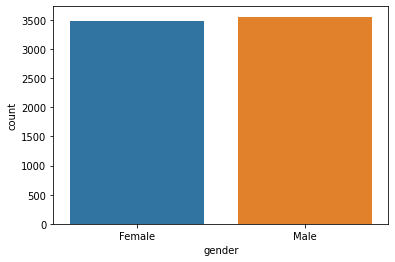

     Partner  Ration
No      3641 51.6967
Yes     3402 48.3033
##########################################


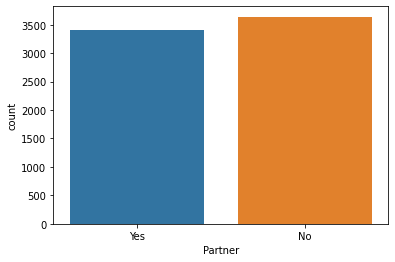

     Dependents  Ration
No         4933 70.0412
Yes        2110 29.9588
##########################################


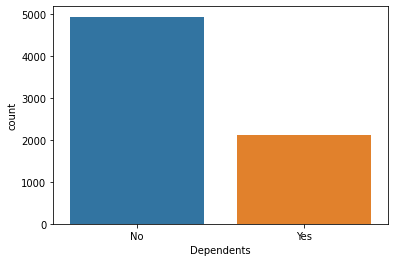

     PhoneService  Ration
Yes          6361 90.3166
No            682  9.6834
##########################################


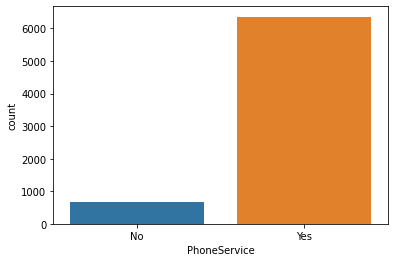

                  MultipleLines  Ration
No                         3390 48.1329
Yes                        2971 42.1837
No phone service            682  9.6834
##########################################


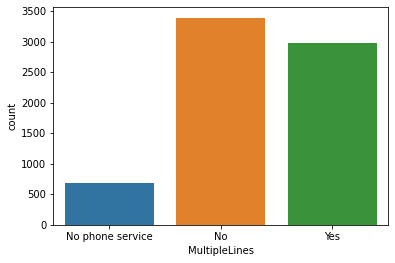

             InternetService  Ration
Fiber optic             3096 43.9585
DSL                     2421 34.3746
No                      1526 21.6669
##########################################


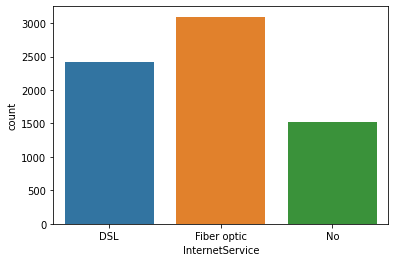

                     OnlineSecurity  Ration
No                             3498 49.6663
Yes                            2019 28.6668
No internet service            1526 21.6669
##########################################


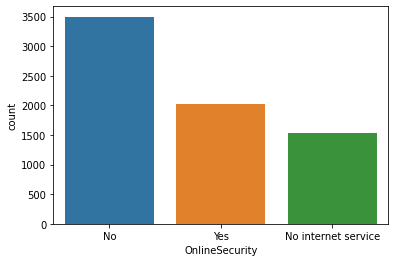

                     OnlineBackup  Ration
No                           3088 43.8450
Yes                          2429 34.4881
No internet service          1526 21.6669
##########################################


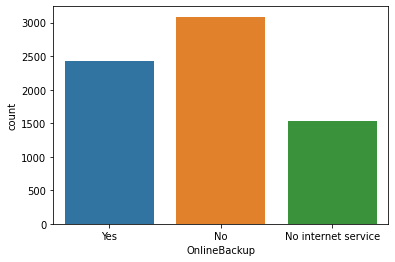

                     DeviceProtection  Ration
No                               3095 43.9443
Yes                              2422 34.3888
No internet service              1526 21.6669
##########################################


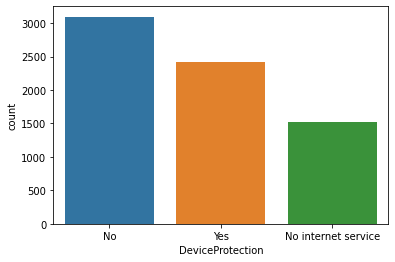

                     TechSupport  Ration
No                          3473 49.3114
Yes                         2044 29.0217
No internet service         1526 21.6669
##########################################


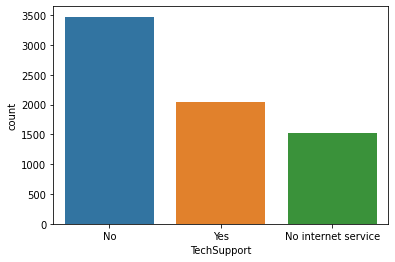

                     StreamingTV  Ration
No                          2810 39.8978
Yes                         2707 38.4353
No internet service         1526 21.6669
##########################################


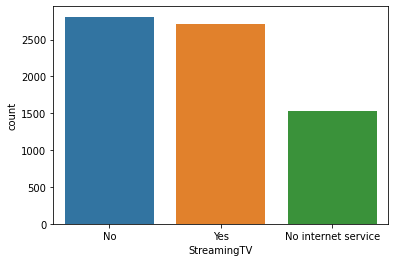

                     StreamingMovies  Ration
No                              2785 39.5428
Yes                             2732 38.7903
No internet service             1526 21.6669
##########################################


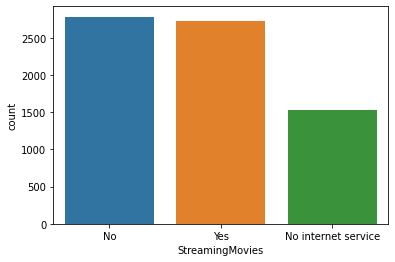

                Contract  Ration
Month-to-month      3875 55.0192
Two year            1695 24.0664
One year            1473 20.9144
##########################################


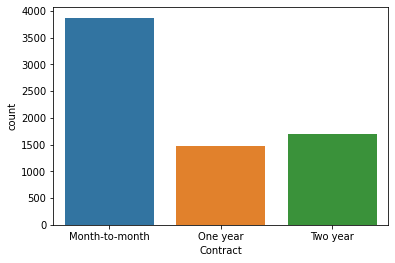

     PaperlessBilling  Ration
Yes              4171 59.2219
No               2872 40.7781
##########################################


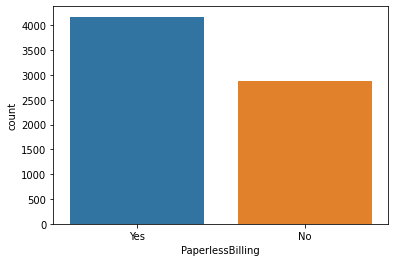

                           PaymentMethod  Ration
Electronic check                    2365 33.5794
Mailed check                        1612 22.8880
Bank transfer (automatic)           1544 21.9225
Credit card (automatic)             1522 21.6101
##########################################


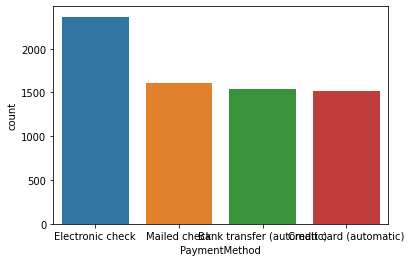

   SeniorCitizen  Ration
0           5901 83.7853
1           1142 16.2147
##########################################


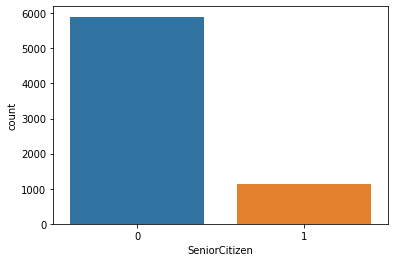

   Churn  Ration
0   5174 73.4630
1   1869 26.5370
##########################################


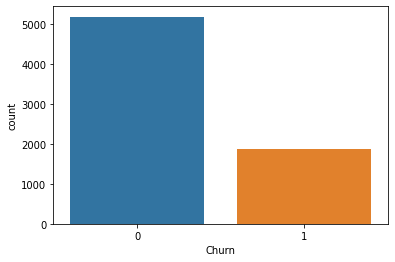

In [10]:
cat_summary_df(df)

In [11]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [12]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   7043.0000
mean      32.3711
std       24.5595
min        0.0000
1%         1.0000
5%         1.0000
10%        2.0000
20%        6.0000
30%       12.0000
40%       20.0000
50%       29.0000
60%       40.0000
70%       50.0000
80%       60.0000
90%       69.0000
95%       72.0000
99%       72.0000
max       72.0000
Name: tenure, dtype: float64


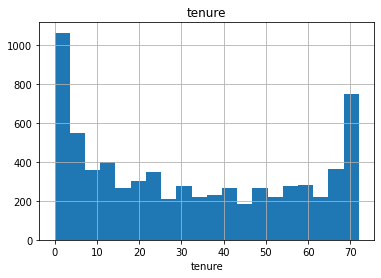

count   7043.0000
mean      64.7617
std       30.0900
min       18.2500
1%        19.2000
5%        19.6500
10%       20.0500
20%       25.0500
30%       45.8500
40%       58.8300
50%       70.3500
60%       79.1000
70%       85.5000
80%       94.2500
90%      102.6000
95%      107.4000
99%      114.7290
max      118.7500
Name: MonthlyCharges, dtype: float64


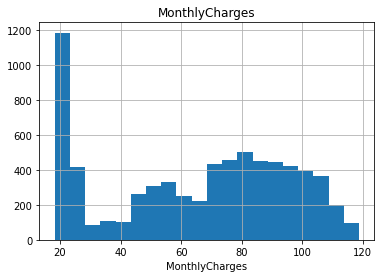

count   7032.0000
mean    2283.3004
std     2266.7714
min       18.8000
1%        19.9000
5%        49.6050
10%       84.6000
20%      267.0700
30%      551.9950
40%      944.1700
50%     1397.4750
60%     2048.9500
70%     3141.1300
80%     4475.4100
90%     5976.6400
95%     6923.5900
99%     8039.8830
max     8684.8000
Name: TotalCharges, dtype: float64


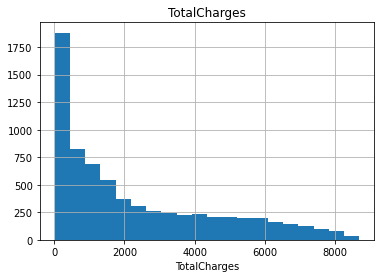

In [13]:
num_summary_df(df)

In [14]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  plt.figure(figsize=(12,4))
  for index, col in enumerate(num_cols):
    plt.subplot(1,3,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

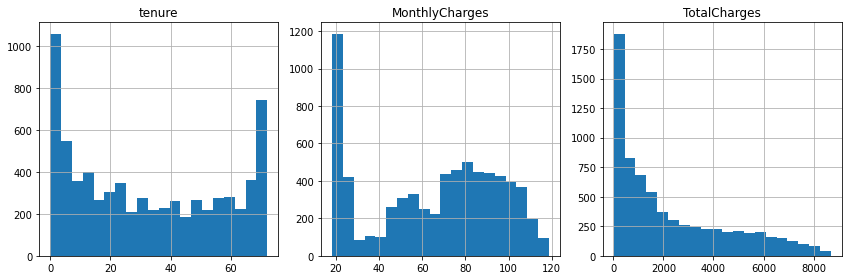

In [15]:
plot_num_summary(df)

In [16]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [17]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [18]:
target_summary_with_num_df(df, "Churn")

       tenure
Churn        
0     37.5700
1     17.9791
#############################################
       MonthlyCharges
Churn                
0             61.2651
1             74.4413
#############################################
       TotalCharges
Churn              
0         2555.3441
1         1531.7961
#############################################


In [19]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(categorical_col)
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                      "Count": dataframe[categorical_col].value_counts(),
                      "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}))
  print("#############################################")

In [20]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [21]:
target_summary_with_cat_df(df, "Churn")

gender
        TARGET_MEAN  Count   Ratio
Female       0.2692   3488 49.5244
Male         0.2616   3555 50.4756
#############################################
Partner
     TARGET_MEAN  Count   Ratio
No        0.3296   3641 51.6967
Yes       0.1966   3402 48.3033
#############################################
Dependents
     TARGET_MEAN  Count   Ratio
No        0.3128   4933 70.0412
Yes       0.1545   2110 29.9588
#############################################
PhoneService
     TARGET_MEAN  Count   Ratio
No        0.2493    682  9.6834
Yes       0.2671   6361 90.3166
#############################################
MultipleLines
                  TARGET_MEAN  Count   Ratio
No                     0.2504   3390 48.1329
No phone service       0.2493    682  9.6834
Yes                    0.2861   2971 42.1837
#############################################
InternetService
             TARGET_MEAN  Count   Ratio
DSL               0.1896   2421 34.3746
Fiber optic       0.4189   3096 43.9585
No      

# Correlation Analysis

In [22]:
df[num_cols].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.0000,0.2479,0.8259
MonthlyCharges,0.2479,1.0000,0.6511
TotalCharges,0.8259,0.6511,1.0000


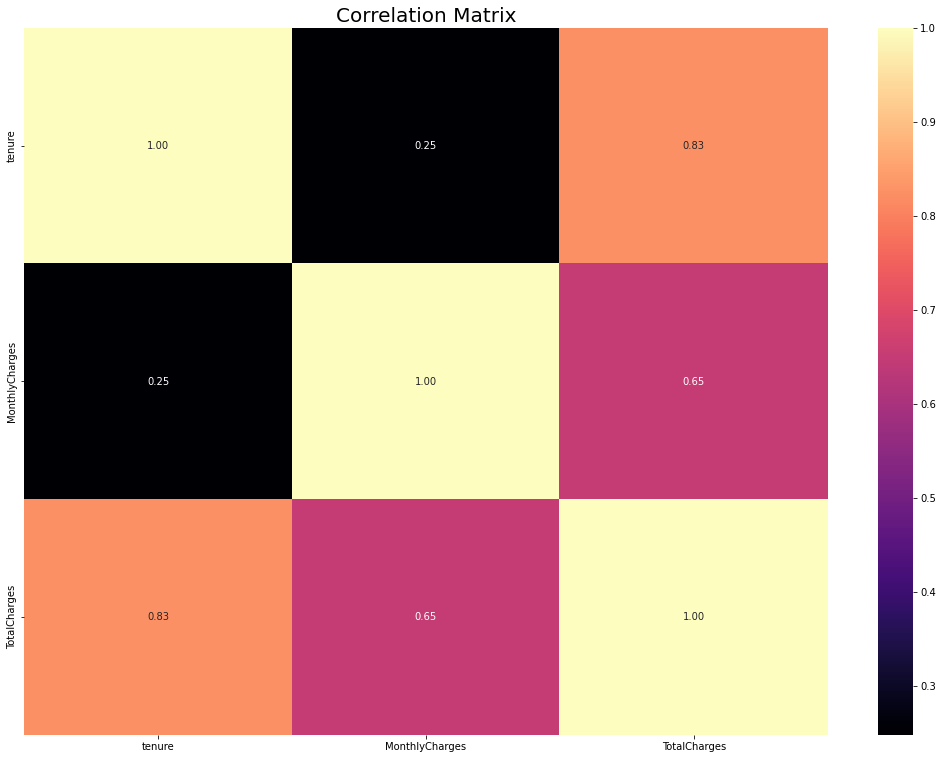

In [23]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

<ipython-input-24-dcff60c12093>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


############## After Correlation Analysis, You Don't Need to Remove Variables ##############


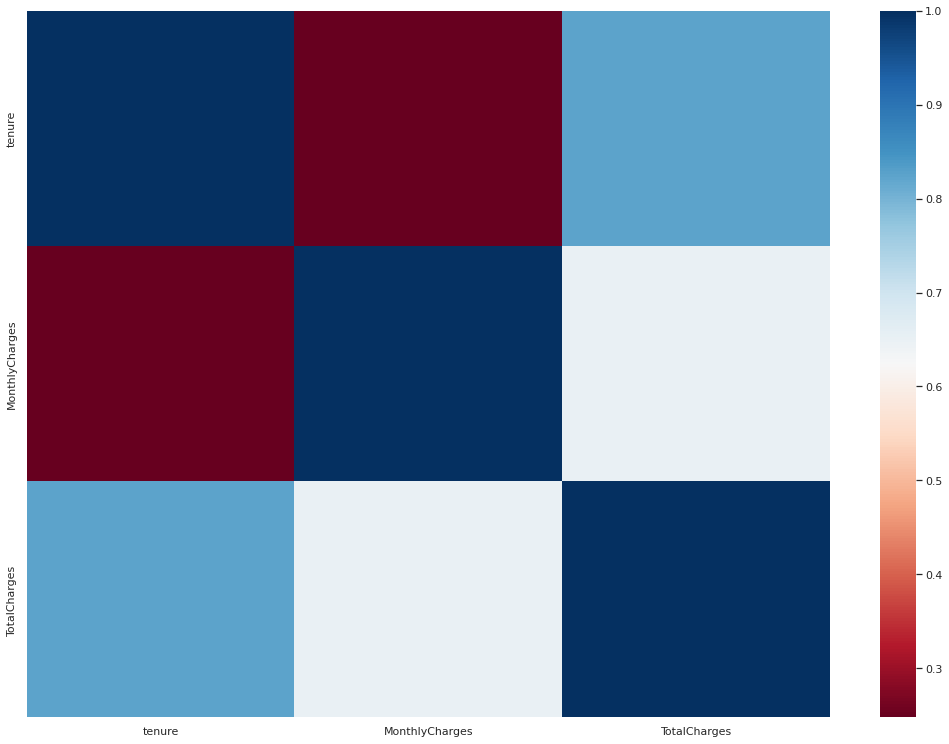

[]

In [25]:
high_correlated_cols(df[num_cols], plot=True)

In [26]:
df.corrwith(df["Churn"]).sort_values(ascending=False)

Churn             1.0000
MonthlyCharges    0.1934
SeniorCitizen     0.1509
TotalCharges     -0.1995
tenure           -0.3522
dtype: float64

# Exploratory Data Analysis

In [27]:
def exploratory_data(dataframe):
  import warnings
  warnings.filterwarnings('ignore')
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  fig,ax = plt.subplots(len(num_cols),3,figsize=(20,20))
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")

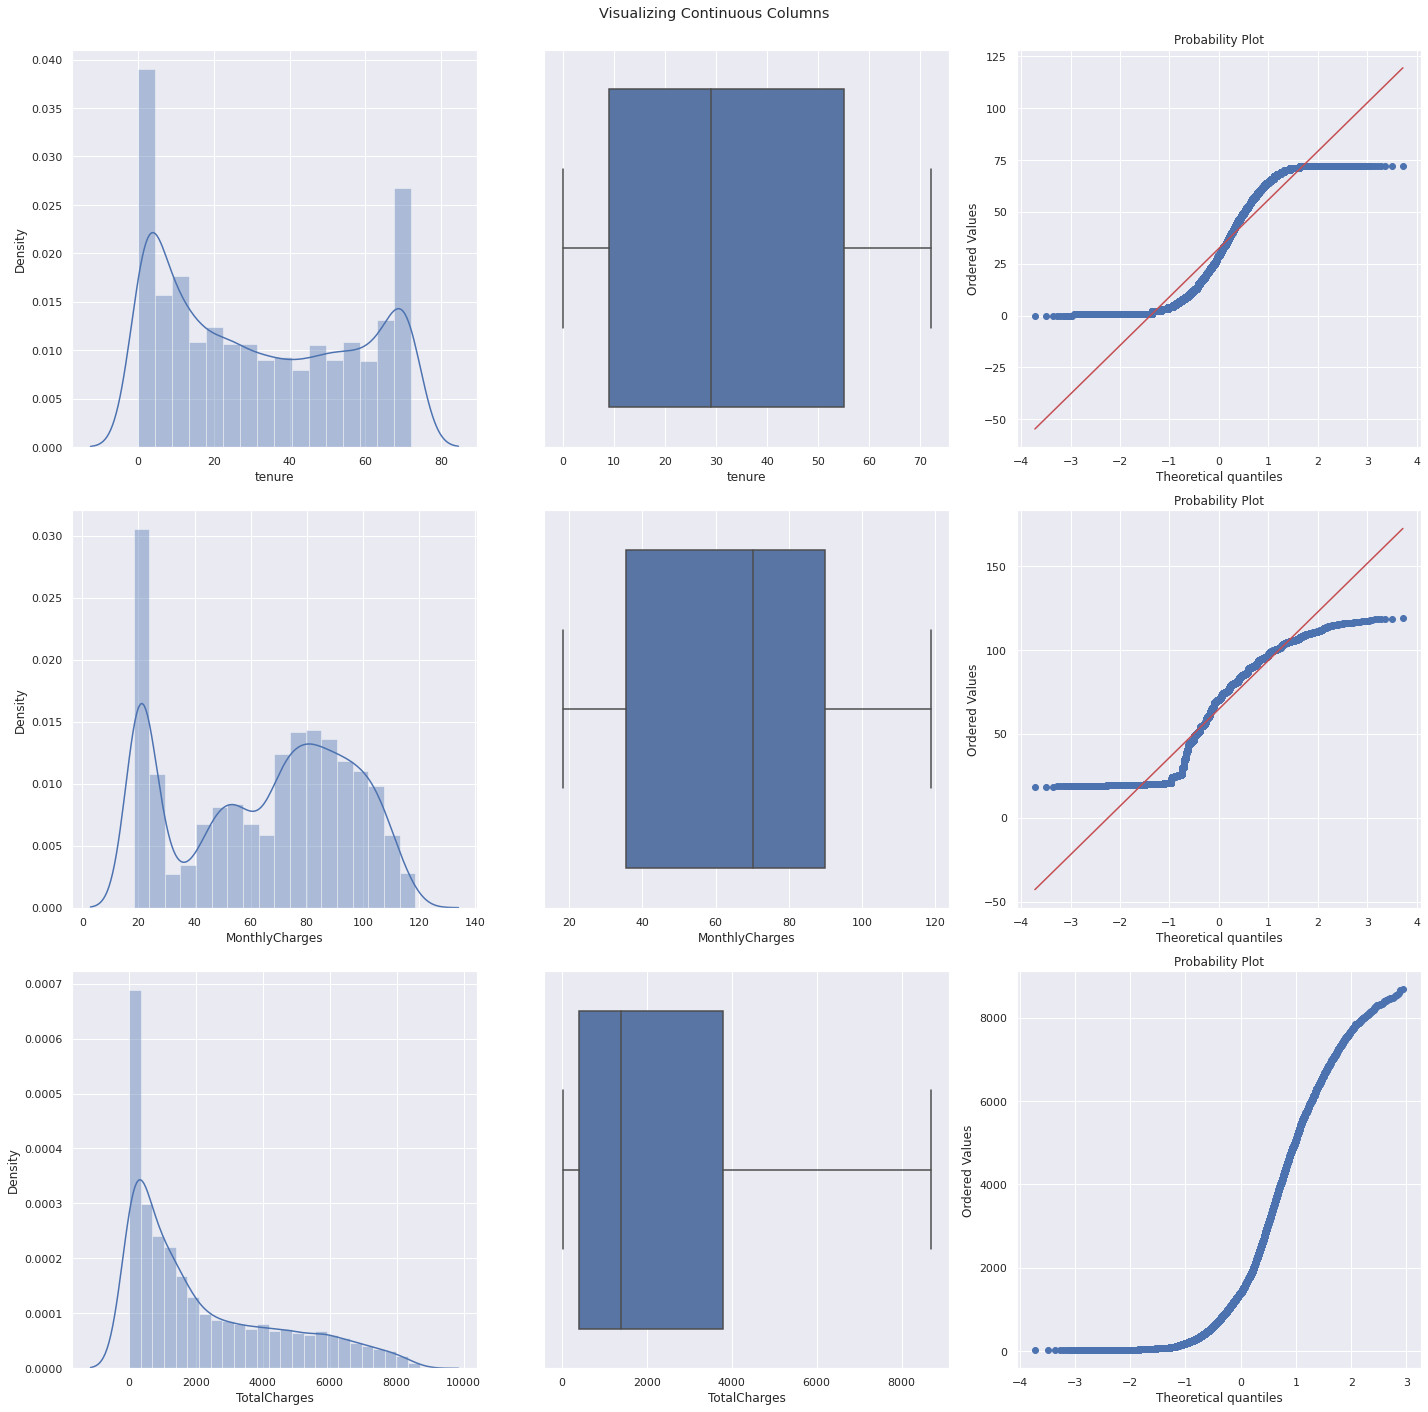

In [28]:
exploratory_data(df)

# Missing Value Analysis

In [29]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [31]:
na_columns = missing_value_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11 0.1600


In [32]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Outlier Analysis

In [33]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [34]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [35]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [36]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [37]:
solve_outliers(df, "Churn")

tenure False
MonthlyCharges False
TotalCharges False


In [38]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [39]:
check_outlier_df(df, "Churn")

tenure False
MonthlyCharges False
TotalCharges False


# Feature Extraction

In [40]:
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0,0-1 Year,0,1,1,1,0,0,14.9250,0.5000,14.9250
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0,2-3 Year,1,1,0,3,0,0,53.9857,0.9479,14.2375
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1,0-1 Year,0,1,1,3,0,0,36.0500,0.6695,13.4625
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,0,3-4 Year,1,1,0,3,0,1,40.0163,0.9460,10.5750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,1,0-1 Year,0,1,1,1,0,0,50.5500,0.7150,35.3500


# Encoding Scaling

In [42]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [43]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [44]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)

In [45]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
def one_hot_encoding(dataframe, cat_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [46]:
df = one_hot_encoding(df, cat_cols, drop_first=True)

In [47]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TotalServices,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,SeniorCitizen_1,NEW_Engaged_1,NEW_noProt_1,NEW_Young_Not_Engaged_1,NEW_FLAG_ANY_STREAMING_1,NEW_FLAG_AutoPayment_1
0,7590-VHVEG,0,1,0,1,0,1,29.8500,29.8500,0,1,14.9250,0.5000,14.9250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,5575-GNVDE,1,0,0,34,1,0,56.9500,1889.5000,0,3,53.9857,0.9479,14.2375,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,1,0,0,2,1,1,53.8500,108.1500,1,3,36.0500,0.6695,13.4625,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,45,0,0,42.3000,1840.7500,0,3,40.0163,0.9460,10.5750,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,0,0,0,2,1,1,70.7000,151.6500,1,1,50.5500,0.7150,35.3500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


# Create a Base Model

In [48]:
def create_base_model(dataframe, target, test_size=0.20, cv=10, plot=False, save_results=False):
  names = []
  acc_results = []
  acc_train_results = []
  acc_test_results = []
  r2_results = []
  r2_train_results = []
  r2_test_results = []
  cv_results_acc = []
  cv_results_f1 = []
  cv_results_roc_auc = []

  X = dataframe.drop([target, "customerID"], axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
  rs = 123
  models = [('LogR', LogisticRegression(random_state=rs)),
            ("NB", GaussianNB()),
            ("KNN", KNeighborsClassifier()),
            ("SVC", SVC(random_state=rs)),
            ('ANN', MLPClassifier(random_state=rs)),
            ('CART', DecisionTreeClassifier(random_state=rs)),
            ('RF', RandomForestClassifier(random_state=rs)),
            ("AdaBoost", AdaBoostClassifier(random_state=rs)),
            ('BGTrees', BaggingClassifier(bootstrap_features=True, random_state=rs)),
            ('GBM', GradientBoostingClassifier(random_state=rs)),
            ("XGBoost", XGBClassifier(objective='reg:squarederror', random_state=rs)),
            ("LightGBM", LGBMClassifier(random_state=rs)),
            ("CatBoost", CatBoostClassifier(verbose=False, random_state=rs))]

  for name, classifier in models:
    model_fit = classifier.fit(X_train, y_train)
    # Acc Score
    acc = accuracy_score(y, model_fit.predict(X))
    acc_train = accuracy_score(y_train, model_fit.predict(X_train))
    acc_test = accuracy_score(y_test, model_fit.predict(X_test))
    acc_results.append(acc)
    acc_train_results.append(acc_train)
    acc_test_results.append(acc_test)

    # R2 Score
    r2 = model_fit.score(X, y)
    r2_train = model_fit.score(X_train, y_train)
    r2_test = model_fit.score(X_test, y_test)
    r2_results.append(r2)
    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)

    # Cross Validate Score
    cv_result = cross_validate(model_fit, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_result_acc = cv_result["test_accuracy"].mean()
    cv_result_f1 = cv_result["test_f1"].mean()
    cv_result_roc_auc = cv_result["test_roc_auc"].mean()
    cv_results_acc.append(cv_result_acc)
    cv_results_f1.append(cv_result_f1)
    cv_results_roc_auc.append(cv_result_roc_auc)

    # Model names
    names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'Acc': acc_results,
                                'Acc_Train': acc_train_results,
                                'Acc_Test': acc_test_results,
                                'R2': acc_train_results,
                                'R2_Train': r2_train_results,
                                'R2_Test': r2_test_results,
                                'CV_Acc': cv_results_acc,
                                'CV_f1': cv_results_f1,
                                'CV_roc_auc': cv_results_roc_auc
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="CV_roc_auc", ascending=False)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='CV_roc_auc', y=model_results.index, data=model_results, color="r")
    plt.xlabel('Roc_Auc')
    plt.ylabel('Model Names')
    plt.title('Roc_Auc for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

               Acc  Acc_Train  Acc_Test     R2  R2_Train  R2_Test  CV_Acc  CV_f1  CV_roc_auc
Model_Names                                                                                 
LogR        0.8060     0.8062    0.8055 0.8062    0.8062   0.8055  0.8036 0.5790      0.8457
GBM         0.8269     0.8358    0.7913 0.8358    0.8358   0.7913  0.8038 0.5853      0.8455
XGBoost     0.8220     0.8287    0.7949 0.8287    0.8287   0.7949  0.8011 0.5712      0.8445
AdaBoost    0.8080     0.8097    0.8013 0.8097    0.8097   0.8013  0.8025 0.5873      0.8441
CatBoost    0.8680     0.8884    0.7864 0.8884    0.8884   0.7864  0.7980 0.5755      0.8417
LightGBM    0.8762     0.8974    0.7913 0.8974    0.8974   0.7913  0.7968 0.5788      0.8352
RF          0.9547     0.9979    0.7821 0.9979    0.9979   0.7821  0.7988 0.5722      0.8286
NB          0.6828     0.6825    0.6842 0.6825    0.6825   0.6842  0.6798 0.5845      0.8156
BGTrees     0.9409     0.9812    0.7800 0.9812    0.9812   0.7800  0.7

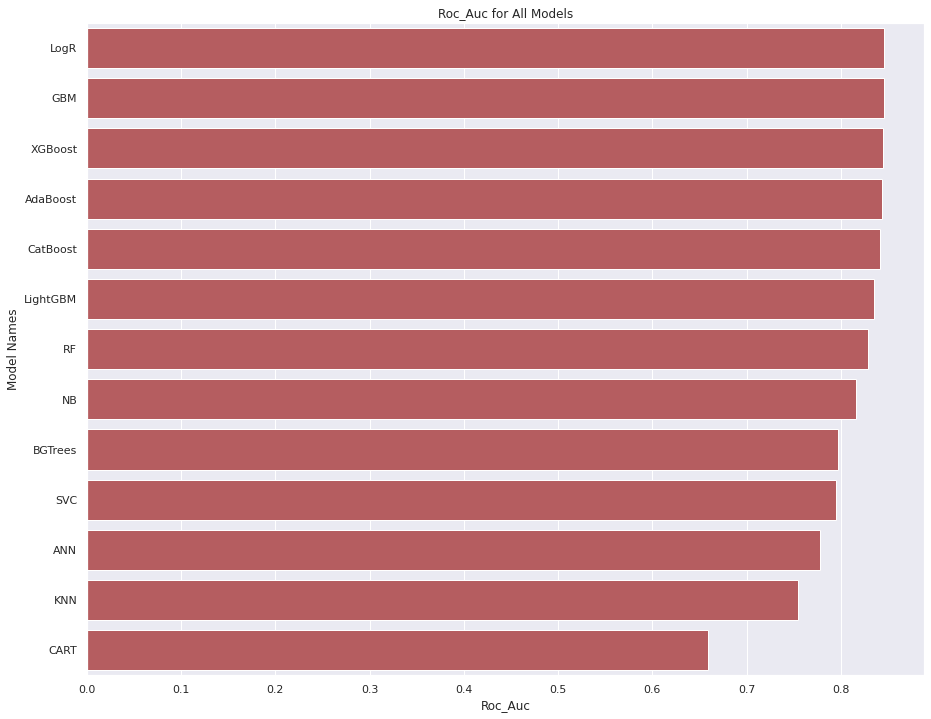

In [49]:
model_results = create_base_model(df, "Churn", test_size=0.20, cv=10, plot=True, save_results=True)

# Create Model Tuned

In [50]:
def create_model_tuned(dataframe, target, test_size=0.20, cv=10, plot=False, save_results=False):
  names = []
  acc_results = []
  acc_train_results = []
  acc_test_results = []
  r2_results = []
  r2_train_results = []
  r2_test_results = []
  cv_results_acc = []
  cv_results_f1 = []
  cv_results_roc_auc = []
  best_params = []

  X = dataframe.drop([target, "customerID"], axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)

  knn_params = {"n_neighbors": np.arange(1,50,1)}

  svc_params = {"C": np.arange(1,10)}

  ann_params = {"alpha": [0.1, 0.01],
                "hidden_layer_sizes": [(50,50,50), (100,100,100), (200,200,200)],
                "solver": ["adam","sgd"],
                "activation": ["relu","logistic"]}

  cart_params = {"max_depth": list(range(1,20)),
                 "min_samples_split": list(range(2,50))}

  rf_params = {"max_depth": [2,5,8],
               "max_features": [2,5,8],
               "n_estimators": [500,1000],
               "min_samples_split": [5,10]}

  adaboost_params = {"learning_rate": [0.1,0.01],
                     "n_estimators": [50,100,500,1000]}

  bgtrees_params = {"max_samples": [1,2,5,8],
                    "max_features": [1,2,5,8],
                    "n_estimators": [10, 50, 100]}

  gbm_params = {"learning_rate": [0.1,0.01],
                "n_estimators": [100,500,1000],
                "max_depth": [3,5,10],
                "min_samples_split": [2,5,10]}

  xgboost_params = {"n_estimators": [500,1000,2000],
                   "subsample": [0.6,0.8,1],
                   "max_depth": [4,5,6],
                   "learning_rate": [0.1,0.01],
                   "min_samples_split": [2,5,10]}

  lightgbm_params = {"n_estimators": [500,1000,2000],
                     "subsample": [0.6,0.8,1],
                     "max_depth": [4,5,6],
                     "learning_rate": [0.1,0.01],
                     "min_child_samples": [5,10,20]}

  catboost_params = {"iterations": [200,500],
                     "learning_rate": [0.1,0.01],
                     "depth": [3,5,8]}

  rs = 123
  models = [("KNN", KNeighborsClassifier(), knn_params),
            ("SVC", SVC(random_state=rs), svc_params),
            ('ANN', MLPClassifier(random_state=rs), ann_params),
            ('CART', DecisionTreeClassifier(random_state=rs), cart_params),
            ('RF', RandomForestClassifier(random_state=rs), rf_params),
            ("AdaBoost", AdaBoostClassifier(random_state=rs), adaboost_params),
            ('BGTrees', BaggingClassifier(bootstrap_features=True, random_state=rs), bgtrees_params),
            ('GBM', GradientBoostingClassifier(random_state=rs), gbm_params),
            ("XGBoost", XGBClassifier(objective='reg:squarederror', random_state=rs), xgboost_params),
            ("LightGBM", LGBMClassifier(random_state=rs), lightgbm_params),
            ("CatBoost", CatBoostClassifier(verbose=False, random_state=rs), catboost_params)]

  for name, classifier, params in models:
    gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
    final_model = classifier.set_params(**gs_best.best_params_).fit(X_train, y_train)
    # Acc Score
    acc = accuracy_score(y, final_model.predict(X))
    acc_train = accuracy_score(y_train, final_model.predict(X_train))
    acc_test = accuracy_score(y_test, final_model.predict(X_test))
    acc_results.append(acc)
    acc_train_results.append(acc_train)
    acc_test_results.append(acc_test)

    # R2 Score
    r2 = final_model.score(X, y)
    r2_train = final_model.score(X_train, y_train)
    r2_test = final_model.score(X_test, y_test)
    r2_results.append(r2)
    r2_train_results.append(r2_train)
    r2_test_results.append(r2_test)

    # Cross Validate Score
    cv_result = cross_validate(final_model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc"])
    cv_result_acc = cv_result["test_accuracy"].mean()
    cv_result_f1 = cv_result["test_f1"].mean()
    cv_result_roc_auc = cv_result["test_roc_auc"].mean()
    cv_results_acc.append(cv_result_acc)
    cv_results_f1.append(cv_result_f1)
    cv_results_roc_auc.append(cv_result_roc_auc)

    # Best Params
    best_params.append(gs_best.best_params_)

    # Model names
    names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'Acc': acc_results,
                                'Acc_Train': acc_train_results,
                                'Acc_Test': acc_test_results,
                                'R2': acc_train_results,
                                'R2_Train': r2_train_results,
                                'R2_Test': r2_test_results,
                                'CV_Acc': cv_results_acc,
                                'CV_f1': cv_results_f1,
                                'CV_roc_auc': cv_results_roc_auc,
                                'best_params': best_params
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="CV_roc_auc", ascending=False)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='CV_roc_auc', y=model_results.index, data=model_results, color="r")
    plt.xlabel('Roc_Auc')
    plt.ylabel('Model Names')
    plt.title('Roc_Auc for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

               Acc  Acc_Train  Acc_Test     R2  R2_Train  R2_Test  CV_Acc  CV_f1  CV_roc_auc                                        best_params
Model_Names                                                                                                                                    
XGBoost     0.8298     0.8392    0.7921 0.8392    0.8392   0.7921  0.8016 0.5742      0.8456  {'learning_rate': 0.01, 'max_depth': 4, 'min_s...
AdaBoost    0.8112     0.8133    0.8027 0.8133    0.8133   0.8027  0.8029 0.5873      0.8455       {'learning_rate': 0.1, 'n_estimators': 1000}
CatBoost    0.8370     0.8456    0.8027 0.8456    0.8456   0.8027  0.8026 0.5806      0.8450  {'depth': 8, 'iterations': 500, 'learning_rate...
GBM         0.8265     0.8355    0.7906 0.8355    0.8355   0.7906  0.7984 0.5712      0.8438  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...
RF          0.8447     0.8557    0.8006 0.8557    0.8557   0.8006  0.7999 0.5576      0.8437  {'max_depth': 10, 'max_features': 2, 'min_

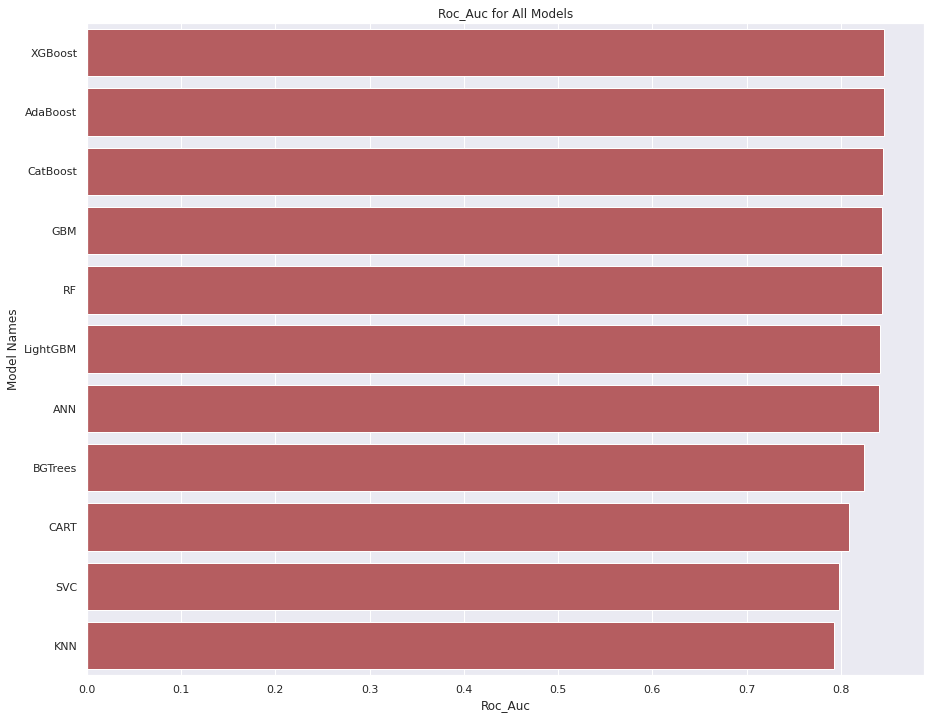

In [52]:
model_results = create_model_tuned(df, "Churn", test_size=0.20, cv=3, plot=True, save_results=True)

# Importance Features

In [55]:
def create_xgboost_model(dataframe, target, test_size=0.20, cv=3):
  X = dataframe.drop([target, "customerID"], axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
  xgboost_model = XGBClassifier(random_state=17)
  xgboost_params = {"n_estimators": [500,1000],
                   "subsample": [0.6,0.8,1],
                   "max_depth": [4,5,6],
                   "learning_rate": [0.1,0.01],
                   "min_samples_split": [2,5,10]}
  xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

  xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)
  
  return xgboost_final

In [56]:
xgboost_final = create_xgboost_model(df, "Churn")

In [57]:
X = df.drop(["Churn", "customerID"], axis=1)
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

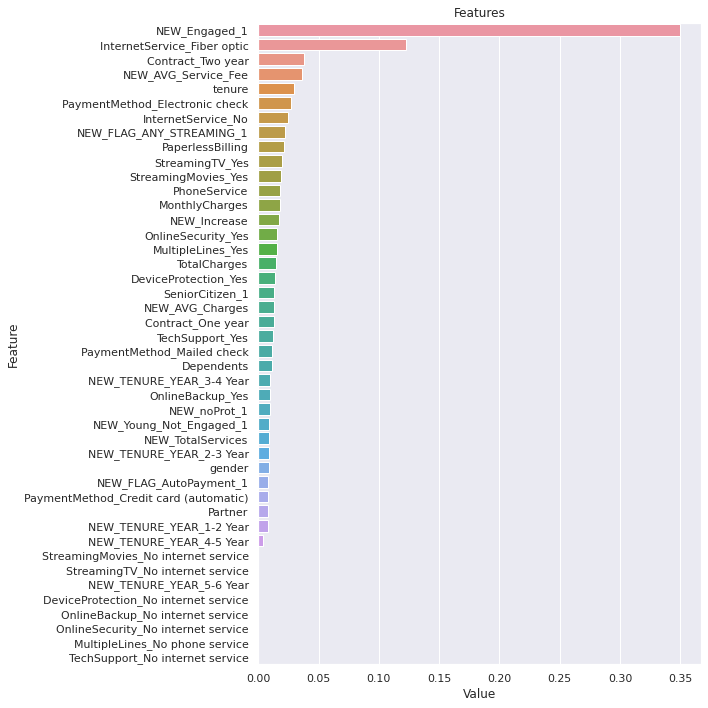

In [58]:
plot_importance(xgboost_final, X)